# <center>Time Series Analysis on Pune precipitation data from 1965 to 2002.</center>

In [83]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
filename = 'LaturRains_1965_2002.csv'

rainfall_data_matrix = pd.read_csv(filename, delimiter='\t')
rainfall_data_matrix.set_index('Year', inplace=True)
rainfall_data_matrix = rainfall_data_matrix.transpose()
rainfall_data_matrix

Year,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
Jan,0.272,5.439,1.318,2.708,0.000,3.224,0.168,0.000,0.000,0.000,...,0.000,12.229,14.457,0.376,11.575,0.000,0.000,0.000,7.385,10.846
Feb,0.082,1.949,0.705,54.213,0.000,0.000,0.000,0.649,0.092,0.000,...,1.527,6.256,0.000,3.540,0.000,2.786,8.173,6.343,0.000,0.324
Mar,0.000,4.044,3.735,35.990,0.804,0.000,0.660,0.025,0.000,0.424,...,2.011,7.880,22.736,1.496,6.189,0.760,0.000,0.000,28.177,4.526
Apr,2.093,5.869,1.509,3.302,4.353,26.318,1.926,9.806,3.731,5.076,...,5.291,29.439,2.986,20.172,34.975,1.652,2.979,4.299,6.978,22.799
May,0.966,10.855,45.454,8.995,9.161,31.172,31.948,13.941,1.903,10.591,...,5.426,14.410,47.057,5.589,9.236,10.623,67.643,35.362,4.065,26.652
Jun,116.539,91.042,112.012,84.793,94.602,155.592,66.813,64.323,120.908,121.562,...,79.872,172.509,112.221,102.987,115.624,62.992,100.700,183.453,167.217,184.453
Jul,180.015,169.883,281.585,161.744,154.272,133.987,36.134,46.536,125.960,133.356,...,156.399,152.076,199.799,173.945,142.485,179.184,120.063,111.489,54.110,43.285
Aug,133.094,126.087,78.833,29.303,120.363,246.748,156.611,84.567,311.337,148.488,...,133.424,154.409,104.556,235.526,206.324,220.036,112.920,290.674,162.756,169.187
Sep,118.691,232.812,142.765,282.873,227.808,290.804,201.626,123.976,140.320,205.555,...,140.457,114.689,251.525,220.787,73.199,273.964,208.238,89.690,108.773,89.070
Oct,2.840,26.421,28.162,59.445,25.490,29.341,163.633,6.477,198.731,309.761,...,189.232,177.968,196.048,183.258,64.386,169.971,129.083,28.533,130.663,67.496


In [3]:
dates = pd.date_range(start='1965-01', freq='MS', periods=len(rainfall_data_matrix.columns)*12)
dates

DatetimeIndex(['1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01',
               ...
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01',
               '2002-11-01', '2002-12-01'],
              dtype='datetime64[ns]', length=456, freq='MS')

Text(0.5,1,'Month vs Precipitation across all years')

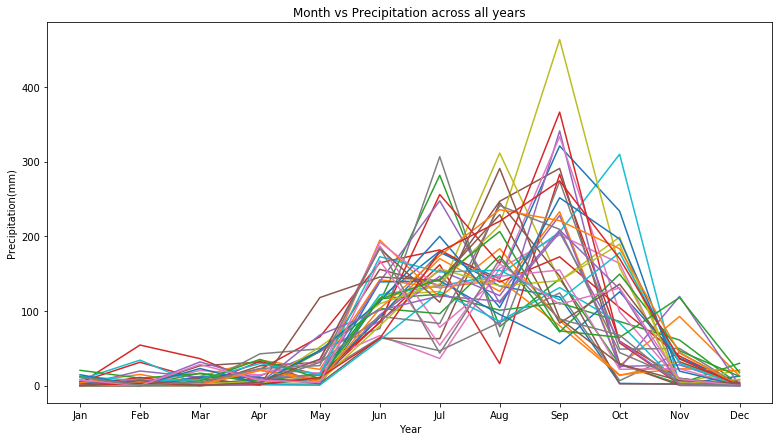

In [4]:
plt.figure(figsize=(13,7))
plt.plot(rainfall_data_matrix)
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

Text(0.5,1,'Month vs Precipitation across all years')

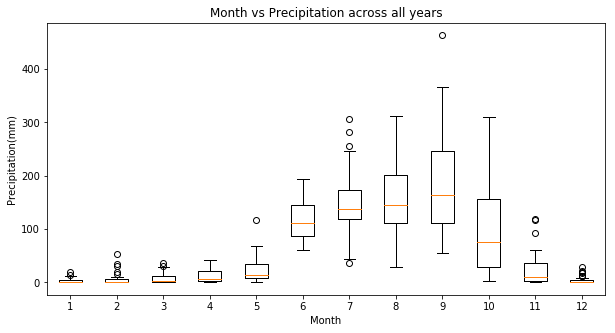

In [5]:
plt.figure(figsize=(10,5))
plt.boxplot(rainfall_data_matrix)
plt.xlabel('Month')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

In [6]:
rainfall_data_matrix_np = rainfall_data_matrix.transpose().as_matrix()

shape = rainfall_data_matrix_np.shape
rainfall_data_matrix_np = rainfall_data_matrix_np.reshape((shape[0] * shape[1], 1))

In [7]:
rainfall_data = pd.DataFrame({'Precipitation': rainfall_data_matrix_np[:,0]})
rainfall_data.set_index(dates, inplace=True)

test_rainfall_data = rainfall_data.ix['1995': '2002']
rainfall_data = rainfall_data.ix[: '1994']
rainfall_data = rainfall_data.round(5)
rainfall_data.head()

,Precipitation
1965-01-01,0.272
1965-02-01,0.082
1965-03-01,0.000
1965-04-01,2.093
1965-05-01,0.966


In [8]:
rainfall_data.shape

(360, 1)

In [9]:
test_rainfall_data.shape

(96, 1)

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))

## <center> Artificial Neural Networks </center>

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

In [99]:
def calculate_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    return mse, mae, mape, rmse

In [86]:
def plot_keras_model(model, show_shapes=True, show_layer_names=True):
    return SVG(model_to_dot(model, show_shapes=show_shapes, show_layer_names=show_layer_names).create(prog='dot',format='svg'))

In [12]:
def get_combinations(parameters):
    return list(itertools.product(*parameters))

In [13]:
def create_NN(input_nodes, hidden_nodes, output_nodes):
    model = Sequential()
    model.add(Dense(hidden_nodes, input_dim=input_nodes))
    model.add(Dense(output_nodes))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [14]:
def train_model(model, X_train, y_train, epochs, batch_size):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, shuffle=True)
    return model

In [15]:
def preprocess_FNN(data, look_back):
    data = np.array(data)[:, 0]
    X_train = []
    y_train = []
    for i in range(data.shape[0]-look_back):
        x = data[i:look_back+i][::-1]
        y = data[look_back+i]
        X_train.append(list(x))
        y_train.append(y)
    input_seq_for_test = data[i+1:look_back+i+1][::-1]
    return X_train, y_train, input_seq_for_test

In [16]:
def forecast_FNN(model, input_sequence, future_steps):
    forecasted_values = []
    for i in range(future_steps):
        forecasted_value = model.predict(input_sequence)
        forecasted_values.append(forecasted_value[0][0])
        input_sequence[0] = np.append(forecasted_value, input_sequence[0][:-1])
    return forecasted_values

In [17]:
def FNN(data, look_back, hidden_nodes, output_nodes, epochs, batch_size, future_steps):
    X_train, y_train, input_seq_for_test_FNN = preprocess_FNN(data, look_back)
    X_train, y_train = reshape_arrays(X_train, y_train)

    model_FNN = create_NN(input_nodes=look_back, hidden_nodes=hidden_nodes, output_nodes=output_nodes)
    model_FNN = train_model(model_FNN, X_train, y_train, epochs, batch_size)

    input_seq_for_test_FNN = np.reshape(input_seq_for_test_FNN, (1, len(input_seq_for_test_FNN)))
    forecasted_values_FNN = forecast_FNN(model_FNN, input_sequence=input_seq_for_test_FNN, future_steps=future_steps)
    
    return model_FNN, forecasted_values_FNN

In [18]:
def preprocess_TLNN(data, time_lagged_points):
    data = np.array(data)[:, 0]
    X_train = []
    y_train = []
    for i in range(max(time_lagged_points), data.shape[0]):
        x = [data[i-p] for p in time_lagged_points]
        y = data[i]
        X_train.append(list(x))
        y_train.append(y)
    input_seq_for_test = [data[i+1-p] for p in time_lagged_points]
    return X_train, y_train, input_seq_for_test

In [19]:
def forecast_TLNN(model, time_lagged_points, last_sequence, future_steps):
    forecasted_values = []
    max_lag = max(time_lagged_points)
    for i in range(future_steps):
        input_sequence = [last_sequence[max_lag - p] for p in time_lagged_points]
        forecasted_value = model.predict(np.reshape(input_sequence, (1, len(input_sequence))))
        forecasted_values.append(forecasted_value[0][0])
        last_sequence = last_sequence[1:] + [forecasted_value[0][0]]
    return forecasted_values

In [20]:
def TLNN(data, time_lagged_points, hidden_nodes, output_nodes, epochs, batch_size, future_steps):
    X_train, y_train, input_seq_for_test_TLNN = preprocess_TLNN(data, time_lagged_points)
    X_train, y_train = reshape_arrays(X_train, y_train)

    model_TLNN = create_NN(input_nodes=len(time_lagged_points), hidden_nodes=hidden_nodes, output_nodes=output_nodes)
    model_TLNN = train_model(model_TLNN, X_train, y_train, epochs, batch_size)

    max_lag = max(time_lagged_points)
    forecasted_values_TLNN = forecast_TLNN(model_TLNN, time_lagged_points, 
                                      list(rainfall_data.Precipitation[-max_lag:]), future_steps=future_steps)
    return model_TLNN, forecasted_values_TLNN

In [21]:
def preprocess_SANN(data, seasonal_period):
    data = np.array(data)[:, 0]
    X_train = []
    y_train = []
    for i in range(seasonal_period, data.shape[0]-seasonal_period+1):
        x = data[i-seasonal_period:i][::-1]
        y = data[i:i+seasonal_period]
        X_train.append(list(x))
        y_train.append(list(y))
    input_seq_for_test = data[i+1-seasonal_period:i+1][::-1]
    return X_train, y_train, input_seq_for_test

In [22]:
def forecast_SANN(model, input_sequence, seasonal_period, future_steps):
    iterations = future_steps/seasonal_period
    forecasted_values = []
    for i in range(int(iterations) + 1):
        next_forecasted_values = model.predict(input_sequence)
        forecasted_values += list(next_forecasted_values[0])
        input_sequence = next_forecasted_values
    return forecasted_values[:future_steps]

In [23]:
def SANN(data, seasonal_period, hidden_nodes, epochs, batch_size, future_steps):
    X_train, y_train, input_seq_for_test_SANN = preprocess_SANN(data, seasonal_period)
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    input_seq_for_test_SANN = np.reshape(input_seq_for_test_SANN, (1, len(input_seq_for_test_SANN)))
    model_SANN = create_NN(input_nodes=seasonal_period, hidden_nodes=hidden_nodes, output_nodes=seasonal_period)
    model_SANN = train_model(model_SANN, X_train, y_train, epochs, batch_size)
    
    forecasted_values_SANN = forecast_SANN(model_SANN, input_seq_for_test_SANN, seasonal_period, future_steps=future_steps)
    return model_SANN, forecasted_values_SANN

In [24]:
def reshape_arrays(X_train, y_train):
    X_train = np.array(X_train)
    y_train = np.reshape(y_train, (len(y_train), 1))
    return X_train, y_train

In [44]:
def get_accuracies_FNN(rainfall_data, parameters):
    combination_of_params = get_combinations(parameters)
    information_FNN = []
    iterator = 0
    print('Total: ' + str(len(combination_of_params)))
    
    for param in combination_of_params:
        if (iterator+1) != len(combination_of_params):
            print(iterator+1, end=' -> ')
        else:
            print(iterator+1)
        iterator = iterator+1

        look_back = param[0]
        hidden_nodes = param[1]
        output_nodes = param[2]
        epochs = param[3]
        batch_size = param[4]
        future_steps = param[5]

        model_FNN, forecasted_values_FNN = FNN(rainfall_data, look_back, hidden_nodes, output_nodes, epochs, batch_size, future_steps)

        info = list(param) + forecasted_values_FNN
        information_FNN.append(info)

    information_FNN_df = pd.DataFrame(information_FNN)
    indexes = [str(i) for i in list(range(1, future_steps+1))]
    information_FNN_df.columns = ['look_back', 'hidden_nodes', 'output_nodes', 'epochs', 'batch_size', 'future_steps'] + indexes
    return information_FNN_df

In [45]:
# look_back, hidden_nodes, output_nodes, epochs, batch_size, future_steps

parameters = [[2,3], [2], [1], [10], [5], [20]]
get_accuracies_FNN(rainfall_data, parameters)

Total: 2
1 -> 2


,look_back,hidden_nodes,output_nodes,epochs,batch_size,future_steps,1,2,3,4,...,11,12,13,14,15,16,17,18,19,20
0,2,2,1,10,5,20,2.390391,0.590203,1.319635,0.997930,...,1.095623,1.095206,1.095388,1.095309,1.095343,1.095328,1.095335,1.095332,1.095333,1.095333
1,3,2,1,10,5,20,45.302799,47.648102,13.599408,0.401274,...,3.509008,2.196867,2.386826,2.825510,2.619903,2.270158,2.255978,2.372636,2.354452,2.268612


In [46]:
def get_accuracies_TLNN(rainfall_data, parameters):
    combination_of_params = get_combinations(parameters)
    information_TLNN = []
    iterator = 0
    print('Total: ' + str(len(combination_of_params)))
    
    for param in combination_of_params:
        if (iterator+1) != len(combination_of_params):
            print(iterator+1, end=' -> ')
        else:
            print(iterator+1)
        iterator = iterator+1

        time_lagged_points = param[0]
        hidden_nodes = param[1]
        output_nodes = param[2]
        epochs = param[3]
        batch_size = param[4]
        future_steps = param[5]

        model_TLNN, forecasted_values_TLNN = TLNN(rainfall_data, time_lagged_points, hidden_nodes, output_nodes, epochs, batch_size, future_steps)
        info = list(param) + forecasted_values_TLNN
        information_TLNN.append(info)

    information_TLNN_df = pd.DataFrame(information_TLNN)
    indexes = [str(i) for i in list(range(1, future_steps+1))]
    information_TLNN_df.columns = ['look_back_lags', 'hidden_nodes', 'output_nodes', 'epochs', 'batch_size', 'future_steps'] + indexes
    return information_TLNN_df

In [47]:
# time_lagged_points, hidden_nodes, output_nodes, epochs, batch_size, future_steps

parameters = [[[1,2,3,7,12], [3,4,10]], [2], [1], [10], [5], [20]]
get_accuracies_TLNN(rainfall_data, parameters)

Total: 2
1 -> 2


,look_back_lags,hidden_nodes,output_nodes,epochs,batch_size,future_steps,1,2,3,4,...,11,12,13,14,15,16,17,18,19,20
0,"[1, 2, 3, 7, 12]",2,1,10,5,20,-6.075683,-16.590675,-20.916489,-7.503980,...,68.847069,38.846157,10.689103,-10.675246,-24.609749,-23.975904,-36.017441,14.633026,43.053162,66.204628
1,"[3, 4, 10]",2,1,10,5,20,57.680004,10.727769,4.649962,88.687439,...,48.083679,9.777392,8.735928,50.868210,24.912640,27.934185,47.943668,39.870865,20.770424,24.699266


In [48]:
def get_accuracies_SANN(rainfall_data, parameters):
    combination_of_params = get_combinations(parameters)
    information_SANN = []
    iterator = 0
    print('Total: ' + str(len(combination_of_params)))
    
    for param in combination_of_params:
        if (iterator+1) != len(combination_of_params):
            print(iterator+1, end=' -> ')
        else:
            print(iterator+1)
        iterator = iterator+1

        seasonal_period = param[0]
        hidden_nodes = param[1]
        epochs = param[2]
        batch_size = param[3]
        future_steps = param[4]

        model_SANN, forecasted_values_SANN = SANN(rainfall_data, seasonal_period, hidden_nodes, epochs, batch_size, future_steps)
        info = list(param) + forecasted_values_SANN
        information_SANN.append(info)

    information_SANN_df = pd.DataFrame(information_SANN)
    indexes = [str(i) for i in list(range(1, future_steps+1))]
    information_SANN_df.columns = ['seasonal_period', 'hidden_nodes', 'epochs', 'batch_size', 'future_steps'] + indexes
    return information_SANN_df

In [51]:
# seasonal_period, hidden_nodes, epochs, batch_size, future_steps

parameters = [[8, 12], [4], [10], [5], [20]]
get_accuracies_SANN(rainfall_data, parameters)

Total: 2
1 -> 2


,seasonal_period,hidden_nodes,epochs,batch_size,future_steps,1,2,3,4,5,...,11,12,13,14,15,16,17,18,19,20
0,8,4,10,5,20,81.624886,66.090256,48.102295,89.84935,74.256111,...,15.790575,19.069731,33.737347,38.058079,59.856915,56.536003,25.098345,23.351660,29.902809,41.517326
1,12,4,10,5,20,-0.148534,-3.783816,3.726117,43.35360,73.165474,...,-21.286854,-27.815226,16.380301,23.502764,49.754158,76.761658,85.622719,102.019234,86.779251,44.194344


In [53]:
test_rainfall_data.head()

,Precipitation
1995-01-01,14.457
1995-02-01,0.000
1995-03-01,22.736
1995-04-01,2.986
1995-05-01,47.057


In [101]:
mse, mae, mape, rmse = calculate_performance([2,10,6,5], [2,5,4,4])
print(mse, mae, mape, rmse)

7.5 2.0 25.83333333333333 2.7386127875258306
